In [ ]:
!pip install pyspark

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder \
    .appName("Read CSV from Google Drive") \
    .getOrCreate()
# we are taking a sample of apple stock and we can replace it with any other stock we want
# Define the file path in your Google Drive
file_path = "/content/drive/MyDrive/stocks/AAPL.csv"

# Read the CSV file into a DataFrame
df = spark.read.csv(file_path, header=True, inferSchema=True)

# Show the DataFrame
df.show()


+----------+-------------------+-------------------+-------------------+-------------------+-------------------+---------+
|      Date|               Open|               High|                Low|              Close|          Adj Close|   Volume|
+----------+-------------------+-------------------+-------------------+-------------------+-------------------+---------+
|1980-12-12| 0.1283479928970337| 0.1289059966802597| 0.1283479928970337| 0.1283479928970337| 0.0991920679807663|469033600|
|1980-12-15|0.12221000343561172|0.12221000343561172|0.12165199965238571|0.12165199965238571|0.09401718527078629|175884800|
|1980-12-16| 0.1132809966802597| 0.1132809966802597|0.11272300034761429|0.11272300034761429|0.08711650967597961|105728000|
|1980-12-17|0.11551299691200256|0.11607100069522858|0.11551299691200256|0.11551299691200256|0.08927273005247116| 86441600|
|1980-12-18|0.11886200308799744|0.11941999942064285|0.11886200308799744|0.11886200308799744|0.09186095744371414| 73449600|
|1980-12-19|0.12

In [ ]:
column_names = df.columns
print(column_names)


['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


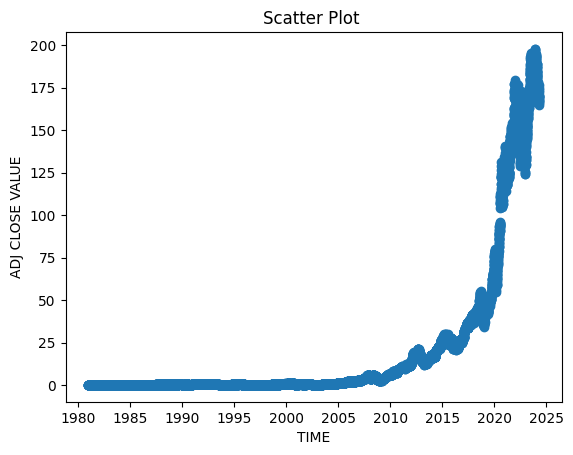

In [ ]:
import matplotlib.pyplot as plt


# Collect data from Spark DataFrame to local Python environment
x_data = df.select("Date").rdd.flatMap(lambda x: x).collect()
y_data = df.select("Adj Close").rdd.flatMap(lambda x: x).collect()

# Plot the data
plt.scatter(x_data, y_data)
plt.xlabel("TIME")
plt.ylabel("ADJ CLOSE VALUE")
plt.title("Scatter Plot ")
plt.show()


In [ ]:
#Importing the Libraries
import pandas as PD
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn. preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras. backend as K
from keras. callbacks import EarlyStopping
from keras. optimizers import Adam
from keras. models import load_model
from keras. layers import LSTM
from keras. utils import plot_model


In [ ]:
from pyspark.sql.functions import col

# Set target variable
output_var = df.select(col('Adj Close'))

In [ ]:
features = ["Open", "High", "Low", "Volume"]


In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import MinMaxScaler
from pyspark.ml.feature import StandardScaler
from pyspark.ml.feature import SQLTransformer
from pyspark.ml import Pipeline


# Convert each feature column into a vector
assemblers = [VectorAssembler(inputCols=[feat], outputCol=feat + "_vec") for feat in features]

# Create MinMaxScaler for each feature column
scalers = [MinMaxScaler(inputCol=feat + "_vec", outputCol=feat + "_scaled") for feat in features]

# Combine assemblers and scalers
stages = assemblers + scalers

# Create a pipeline with all stages
pipeline = Pipeline(stages=stages)

# Fit the pipeline to the data
pipeline_model = pipeline.fit(df)

# Transform the data
scaled_df = pipeline_model.transform(df)

# Select only the scaled features columns
scaled_features_df = scaled_df.select([feat + "_scaled" for feat in features])

# Show the first few rows of the scaled features DataFrame
scaled_features_df.show(5, truncate=False)


+-----------------------+-----------------------+-----------------------+----------------------+
|Open_scaled            |High_scaled            |Low_scaled             |Volume_scaled         |
+-----------------------+-----------------------+-----------------------+----------------------+
|[3.9744838997917304E-4]|[3.9705800127787493E-4]|[4.023388341041138E-4] |[0.06319810034460303] |
|[3.6644379866520145E-4]|[3.6350595353247197E-4]|[3.683405457863459E-4] |[0.023698910354163192]|
|[3.2134104848464864E-4]|[3.1876480012493953E-4]|[3.2300437508524666E-4]|[0.014245906376929478]|
|[3.3261546585418343E-4]|[3.327448542408727E-4] |[3.3717032539851366E-4]|[0.011647235743341283]|
|[3.495321726108993E-4] |[3.4952589941653886E-4]|[3.5417459547307895E-4]|[0.009896679451260966]|
+-----------------------+-----------------------+-----------------------+----------------------+
only showing top 5 rows



In [ ]:
import pandas as pd

# # Convert PySpark DataFrame to pandas DataFrame
scaled_features_updtaed_df= scaled_features_df.toPandas()
output_var_updtaed=output_var.toPandas()

In [ ]:
scaled_features_updtaed_df.head()

,Open_scaled,High_scaled,Low_scaled,Volume_scaled
0,[0.00039744838997917304],[0.00039705800127787493],[0.0004023388341041138],[0.06319810034460303]
1,[0.00036644379866520145],[0.00036350595353247197],[0.0003683405457863459],[0.023698910354163192]
2,[0.00032134104848464864],[0.00031876480012493953],[0.00032300437508524666],[0.014245906376929478]
3,[0.00033261546585418343],[0.0003327448542408727],[0.00033717032539851366],[0.011647235743341283]
4,[0.0003495321726108993],[0.00034952589941653886],[0.00035417459547307895],[0.009896679451260966]


In [ ]:
# Assuming df is your Pandas DataFrame
scaled_features_updtaed_df = scaled_features_updtaed_df.applymap(lambda x: x[0])

# Now your DataFrame will have individual values instead of nested arrays
scaled_features_updtaed_df.head()

,Open_scaled,High_scaled,Low_scaled,Volume_scaled
0,0.000397,0.000397,0.000402,0.063198
1,0.000366,0.000364,0.000368,0.023699
2,0.000321,0.000319,0.000323,0.014246
3,0.000333,0.000333,0.000337,0.011647
4,0.000350,0.000350,0.000354,0.009897


In [ ]:
output_var_updtaed.head()

,Adj Close
0,0.099192
1,0.094017
2,0.087117
3,0.089273
4,0.091861


In [ ]:
print(type(output_var_updtaed))
print(type(scaled_features_updtaed_df))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [ ]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(scaled_features_updtaed_df):
        X_train, X_test = scaled_features_updtaed_df[:len(train_index)], scaled_features_updtaed_df[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var_updtaed[:len(train_index)].values.ravel(), output_var_updtaed[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [ ]:
X_train

,Open_scaled,High_scaled,Low_scaled,Volume_scaled
0,0.000397,0.000397,0.000402,0.063198
1,0.000366,0.000364,0.000368,0.023699
2,0.000321,0.000319,0.000323,0.014246
3,0.000333,0.000333,0.000337,0.011647
4,0.000350,0.000350,0.000354,0.009897
...,...,...,...,...
9938,0.393937,0.395539,0.384631,0.027032
9939,0.384289,0.387822,0.382498,0.021414
9940,0.379036,0.385455,0.380823,0.022414
9941,0.395225,0.396228,0.393656,0.018214


In [ ]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [ ]:
X_train

array([[[3.97448390e-04, 3.97058001e-04, 4.02338834e-04, 6.31981003e-02]],

       [[3.66443799e-04, 3.63505954e-04, 3.68340546e-04, 2.36989104e-02]],

       [[3.21341048e-04, 3.18764800e-04, 3.23004375e-04, 1.42459064e-02]],

       ...,

       [[3.79035753e-01, 3.85454759e-01, 3.80822802e-01, 2.24139654e-02]],

       [[3.95225056e-01, 3.96227911e-01, 3.93655970e-01, 1.82140855e-02]],

       [[3.97573874e-01, 3.98758333e-01, 3.97070530e-01, 1.37071576e-02]]])

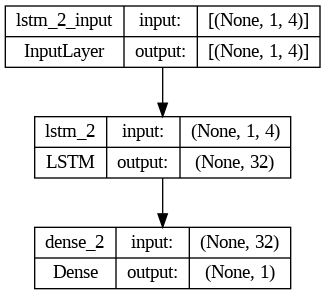

In [ ]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation="relu", return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss="mean_squared_error", optimizer="adam")
plot_model(lstm, show_shapes=True, show_layer_names=True)

In [ ]:
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)


Epoch 1/100
1243/1243 [==============================] - 5s 3ms/step - loss: 3.1493
Epoch 2/100
1243/1243 [==============================] - 3s 3ms/step - loss: 52.8483
Epoch 3/100
1243/1243 [==============================] - 4s 4ms/step - loss: 16.1756
Epoch 4/100
1243/1243 [==============================] - 5s 4ms/step - loss: 3.0815
Epoch 5/100
1243/1243 [==============================] - 3s 3ms/step - loss: 0.5886
Epoch 6/100
1243/1243 [==============================] - 3s 3ms/step - loss: 0.2280
Epoch 7/100
1243/1243 [==============================] - 7s 5ms/step - loss: 0.1459
Epoch 8/100
1243/1243 [==============================] - 4s 3ms/step - loss: 0.1040
Epoch 9/100
1243/1243 [==============================] - 3s 3ms/step - loss: 0.0828
Epoch 10/100
1243/1243 [==============================] - 3s 3ms/step - loss: 0.0739
Epoch 11/100
1243/1243 [==============================] - 5s 4ms/step - loss: 0.0693
Epoch 12/100
1243/1243 [==============================] - 4s 3ms/step - 

In [ ]:
#LSTM Prediction
y_pred= lstm.predict(X_test)

32/32 [==============================] - 0s 4ms/step


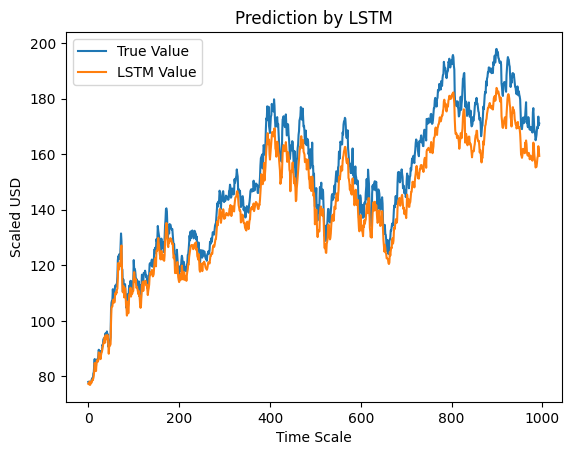

In [ ]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label="True Value")
plt.plot(y_pred, label="LSTM Value")
plt.title("Prediction by LSTM")
plt.xlabel("Time Scale")
plt.ylabel("Scaled USD")
plt.legend()
plt.show()


In [ ]:
rmse=mean_squared_error(y_test,y_pred,squared=False)
print("Rmse:",rmse)


Rmse: 8.275064271122963
